In [1]:
# ST10083627 Kaeurin Govender RPDA8412 Research Project

#______________________________code attribution________________________________________
# The following method was taken from Introduction to Machine Learning with Python:
# Author: Andreas C.Muller & Sarah Guido

# Importing all the necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# We are now allowing the data to be read from this csv file through the usage of the pandas library
data = pd.read_csv('JobThreatIndex.csv')

C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_2568\725658857.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Checking to see if there are any null values
print(data.isnull().sum())

Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64


In [3]:
# Printing an overview of the dataset, and performing basic Exploratory Data Analysis
print("Dataset Overview:")
print(data.head())
print(data.info())
print(data.describe())
data['AI Impact'] = data['AI Impact'].str.rstrip('%').astype('float') / 100.0


Dataset Overview:
              Job titiles AI Impact  Tasks  AI models  AI_Workload_Ratio  \
0  Communications Manager       98%    365       2546           0.143362   
1          Data Collector       95%    299       2148           0.139199   
2              Data Entry       95%    325       2278           0.142669   
3              Mail Clerk       95%    193       1366           0.141288   
4      Compliance Officer       92%    194       1369           0.141709   

                      Domain  
0         Communication & PR  
1                  Data & IT  
2  Administrative & Clerical  
3      Leadership & Strategy  
4       Medical & Healthcare  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   i

c:\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [4]:
# Converting 'AI Impact' from percentage strings to float in order to perform analyses on the dataset
data['AI Impact'] = data['AI Impact'].astype(str).str.replace('%', '').astype(float)

# Selecting the key variables for summary statistics
key_variables = ['AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio']


# Calculating additional statistics
median_values = data[key_variables].median()


# Printing the median values separately 
print("\nMedian Values:")
print(median_values)


Median Values:
AI Impact               0.250000
Tasks                 270.000000
AI models            1577.500000
AI_Workload_Ratio       0.199281
dtype: float64


In [5]:
data.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


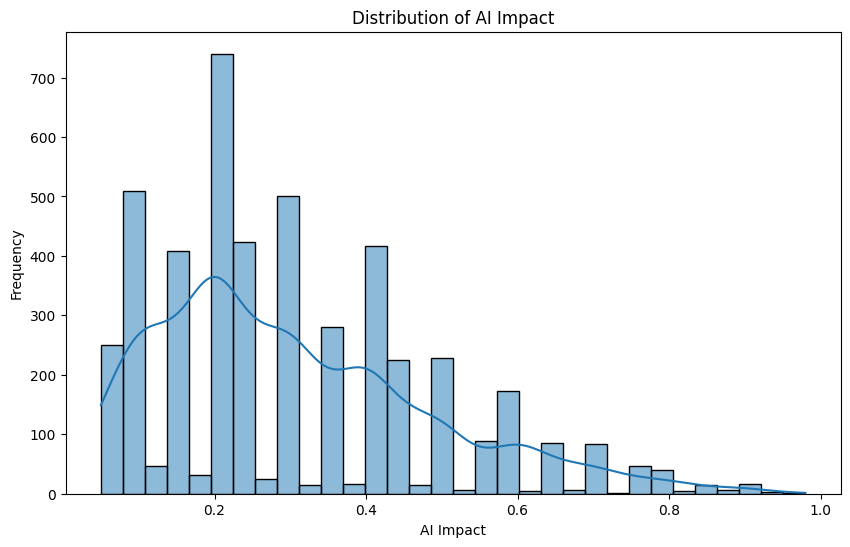

In [6]:

# Graph showcasing the Distribution of AI Impact
plt.figure(figsize=(10, 6))
sns.histplot(data['AI Impact'], kde=True)
plt.title('Distribution of AI Impact')
plt.xlabel('AI Impact')
plt.ylabel('Frequency')
plt.show()

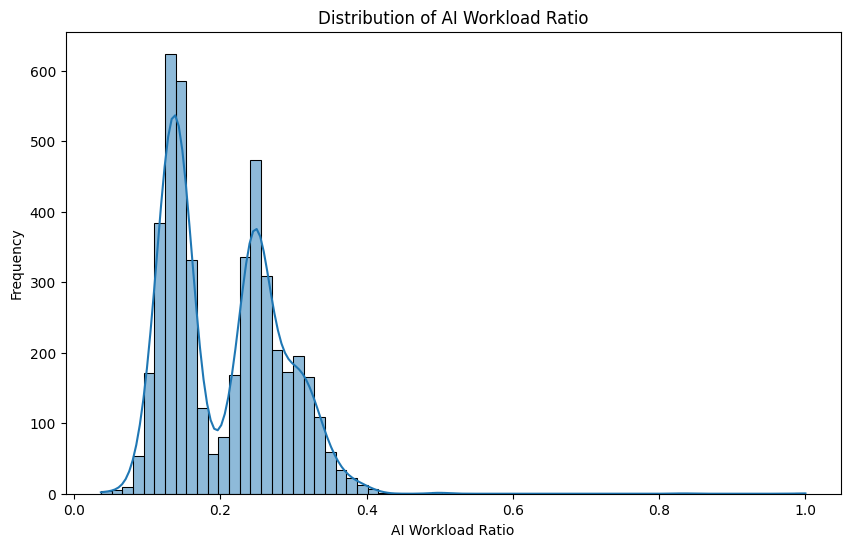

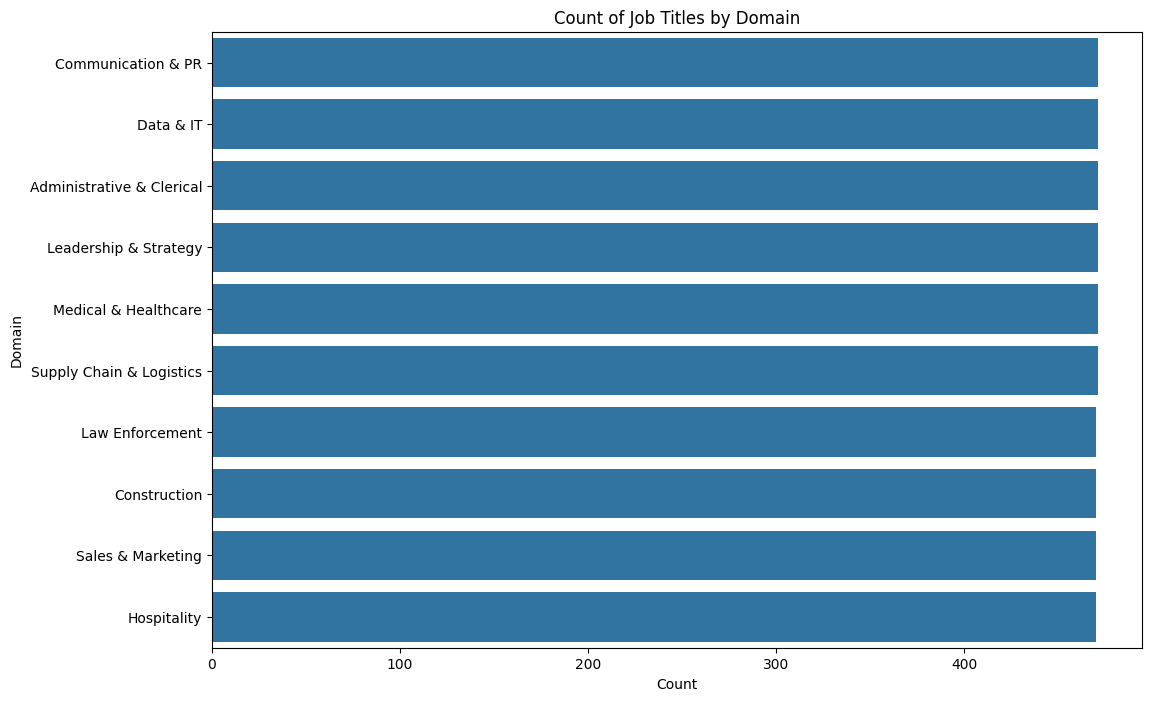

In [7]:

# Plotting the distribution of 'AI_Workload_Ratio'
plt.figure(figsize=(10, 6))
sns.histplot(data['AI_Workload_Ratio'], kde=True)
plt.title('Distribution of AI Workload Ratio')
plt.xlabel('AI Workload Ratio')
plt.ylabel('Frequency')
plt.show()

# Plotting the count of jobs by domain
plt.figure(figsize=(12, 8))
sns.countplot(y='Domain', data=data, order=data['Domain'].value_counts().index)
plt.title('Count of Job Titles by Domain')
plt.xlabel('Count')
plt.ylabel('Domain')
plt.show()





In [8]:
# Displaying descriptive statistics for the "AI Impact" column
print("Descriptive Statistics for AI Impact:")
print(data['AI Impact'].describe())

# Sorting job roles by "AI Impact" in descending order to see the top roles affected by AI
top_roles = data[['Job titiles', 'AI Impact', 'Domain', 'AI models', 'AI_Workload_Ratio']].sort_values(by='AI Impact', ascending=False)

# Displaying the top 10 job roles most affected by AI
print("\nTop 10 Job Roles by AI Impact:")
print(top_roles.head(10))

Descriptive Statistics for AI Impact:
count    4706.000000
mean        0.303126
std         0.182038
min         0.050000
25%         0.150000
50%         0.250000
75%         0.400000
max         0.980000
Name: AI Impact, dtype: float64

Top 10 Job Roles by AI Impact:
                      Job titiles  AI Impact                     Domain  \
0          Communications Manager       0.98         Communication & PR   
2                      Data Entry       0.95  Administrative & Clerical   
3                      Mail Clerk       0.95      Leadership & Strategy   
1                  Data Collector       0.95                  Data & IT   
4              Compliance Officer       0.92       Medical & Healthcare   
5   Chief Executive Officer (CEO)       0.91   Supply Chain & Logistics   
13            Data Entry Operator       0.90      Leadership & Strategy   
19           Web Search Evaluator       0.90                Hospitality   
18               Warehouse Worker       0.90          S

In [9]:
# Displaying descriptive statistics for the "AI Impact" column
print("Descriptive Statistics for AI Impact:")
print(data['AI Impact'].describe())

# Sorting job roles by "AI Impact" in ascending order to see the least affected roles
least_affected_roles = data[['Job titiles', 'AI Impact', 'Domain', 'AI models', 'AI_Workload_Ratio']].sort_values(by='AI Impact', ascending=True)

# Displaying the bottom 10 job roles least affected by AI
print("\nBottom 10 Job Roles by AI Impact:")
print(least_affected_roles.head(10))

Descriptive Statistics for AI Impact:
count    4706.000000
mean        0.303126
std         0.182038
min         0.050000
25%         0.150000
50%         0.250000
75%         0.400000
max         0.980000
Name: AI Impact, dtype: float64

Bottom 10 Job Roles by AI Impact:
                Job titiles  AI Impact                     Domain  AI models  \
4705             Technician       0.05   Supply Chain & Logistics       3256   
4552            Lead Pastor       0.05  Administrative & Clerical       2290   
4551              Deaconess       0.05                  Data & IT       2242   
4550                 Bishop       0.05         Communication & PR       2300   
4549              Zoologist       0.05                Hospitality       1165   
4548             Veterinary       0.05          Sales & Marketing       1600   
4547           Veterinarian       0.05               Construction       1594   
4546          Ranch Manager       0.05            Law Enforcement       1359   
4545   

In [10]:
pearson_corr = data[['AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio']].corr(method='pearson')

# Calculating Spearman correlation coefficients
spearman_corr = data[['AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio']].corr(method='spearman')

# Displaying the correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

Pearson Correlation Matrix:
                   AI Impact     Tasks  AI models  AI_Workload_Ratio
AI Impact           1.000000 -0.419760  -0.413176          -0.287871
Tasks              -0.419760  1.000000   0.928350           0.631305
AI models          -0.413176  0.928350   1.000000           0.346893
AI_Workload_Ratio  -0.287871  0.631305   0.346893           1.000000

Spearman Correlation Matrix:
                   AI Impact     Tasks  AI models  AI_Workload_Ratio
AI Impact           1.000000 -0.447247  -0.409119          -0.269238
Tasks              -0.447247  1.000000   0.904157           0.701217
AI models          -0.409119  0.904157   1.000000           0.368798
AI_Workload_Ratio  -0.269238  0.701217   0.368798           1.000000


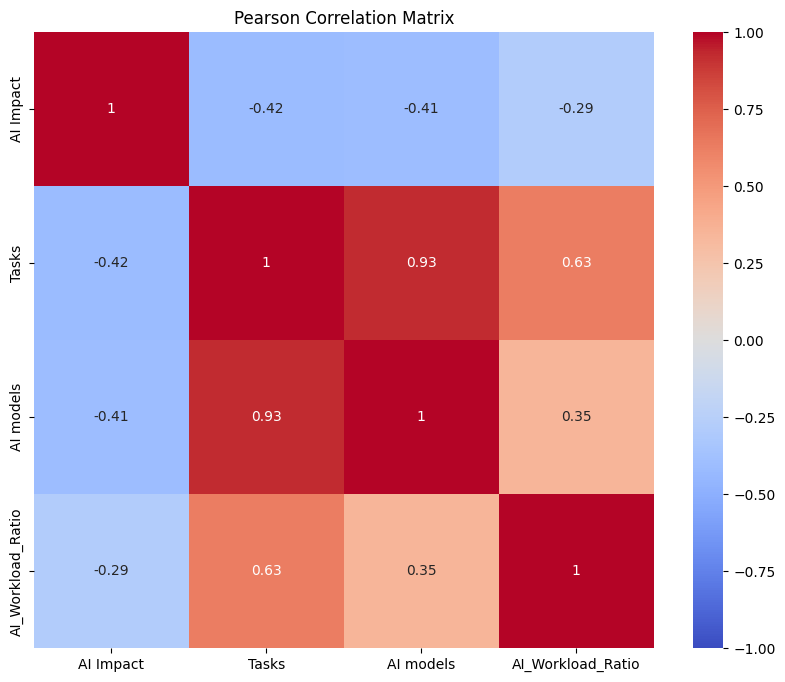

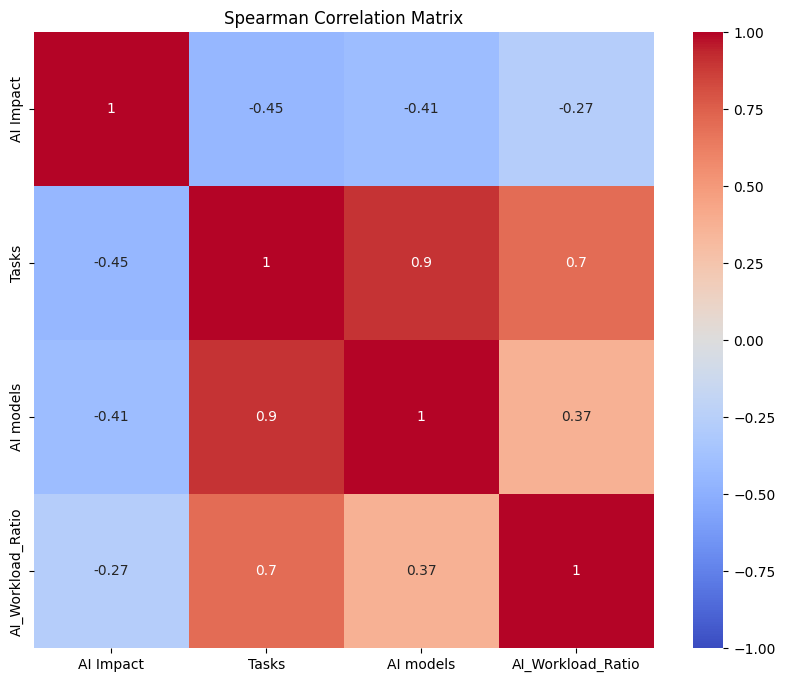

In [11]:
# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

# Visualizing the Spearman correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix')
plt.show()

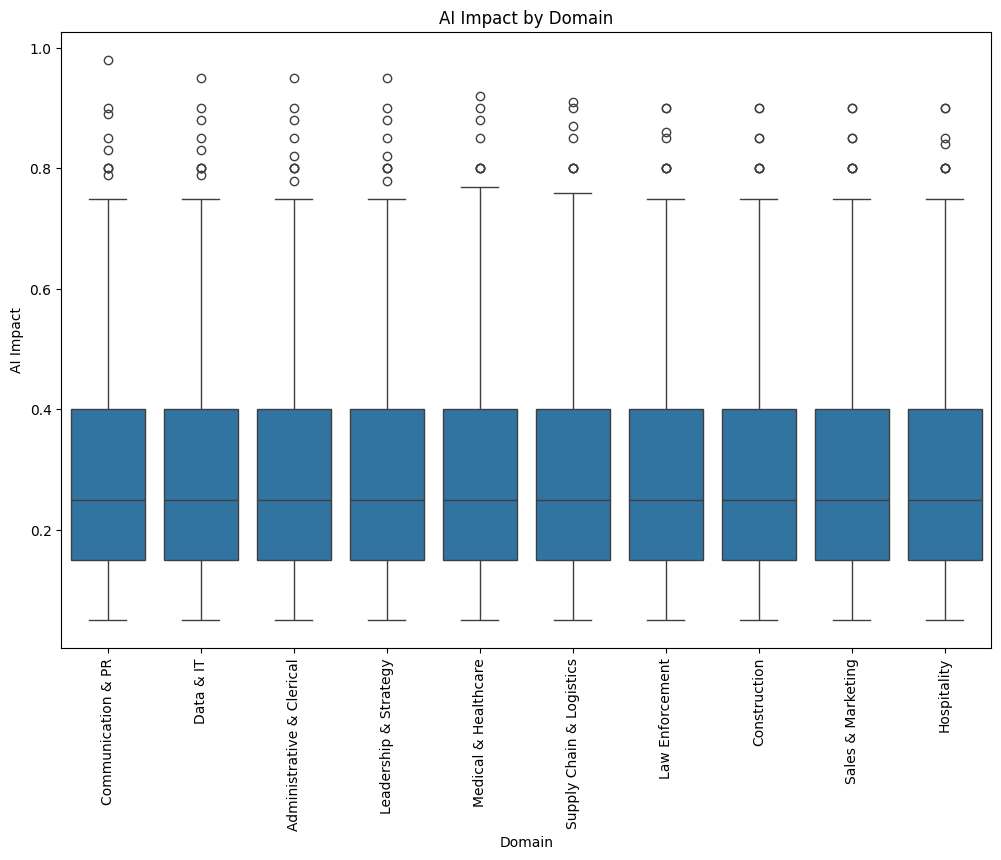

ANOVA results: F_onewayResult(statistic=0.0021703552066021257, pvalue=0.9999999999829011)


In [13]:
# Box plot of AI Impact by Domain
plt.figure(figsize=(12, 8))
sns.boxplot(x='Domain', y='AI Impact', data=data)
plt.title('AI Impact by Domain')
plt.xlabel('Domain')
plt.ylabel('AI Impact')
plt.xticks(rotation=90)
plt.show()

# Conducting the ANOVA test
import scipy.stats as stats
anova_results = stats.f_oneway(*(data[data['Domain'] == domain]['AI Impact'] for domain in data['Domain'].unique()))
print('ANOVA results:', anova_results)

C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_2568\2355548701.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_2568\2355548701.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)  # or X.dropna(inplace=True) if preferred


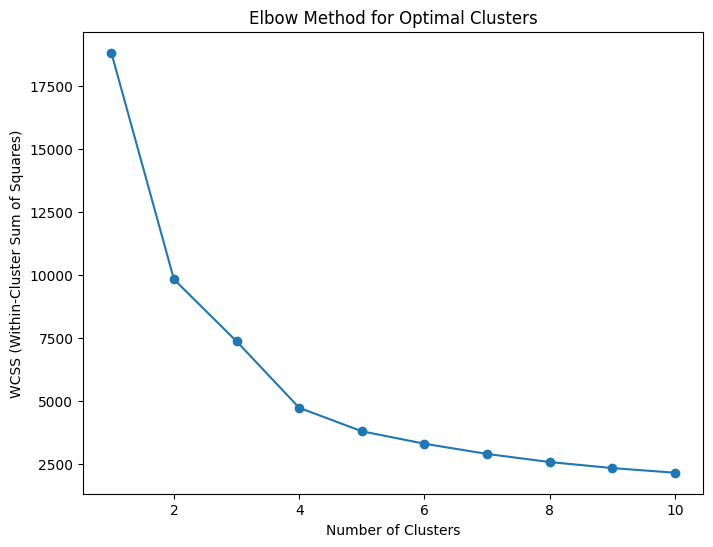

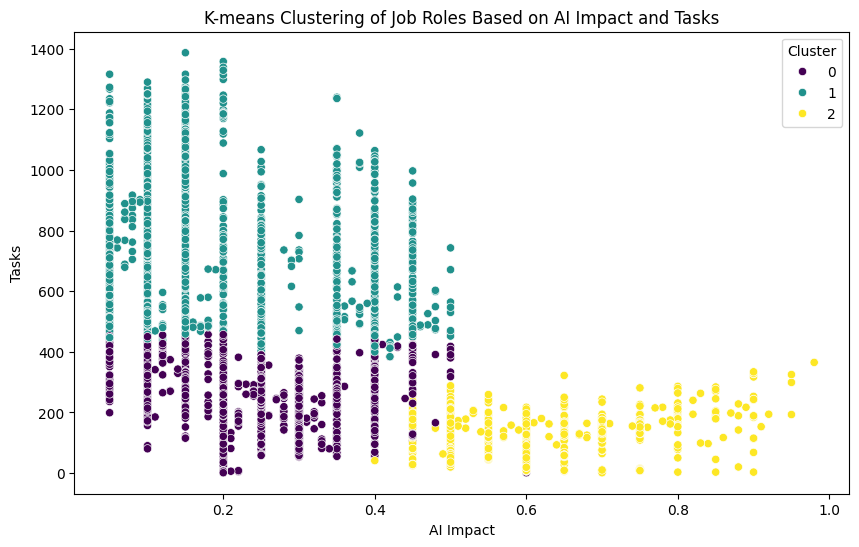

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio']
X = data[features]
# Standardizing the features for better clustering performance
# Check for infinite or NaN values in the dataframe
if np.isinf(X).any().any() or X.isna().any().any():
    print("Warning: The dataset contains infinity or NaN values. Cleaning the data...")

    # Replacing infinite values with NaN and then filling NaNs with the median 
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.median(), inplace=True) 

# Standardizing the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Fitting the K-means model with the optimal number of clusters
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AI Impact', y='Tasks', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of Job Roles Based on AI Impact and Tasks')
plt.show()

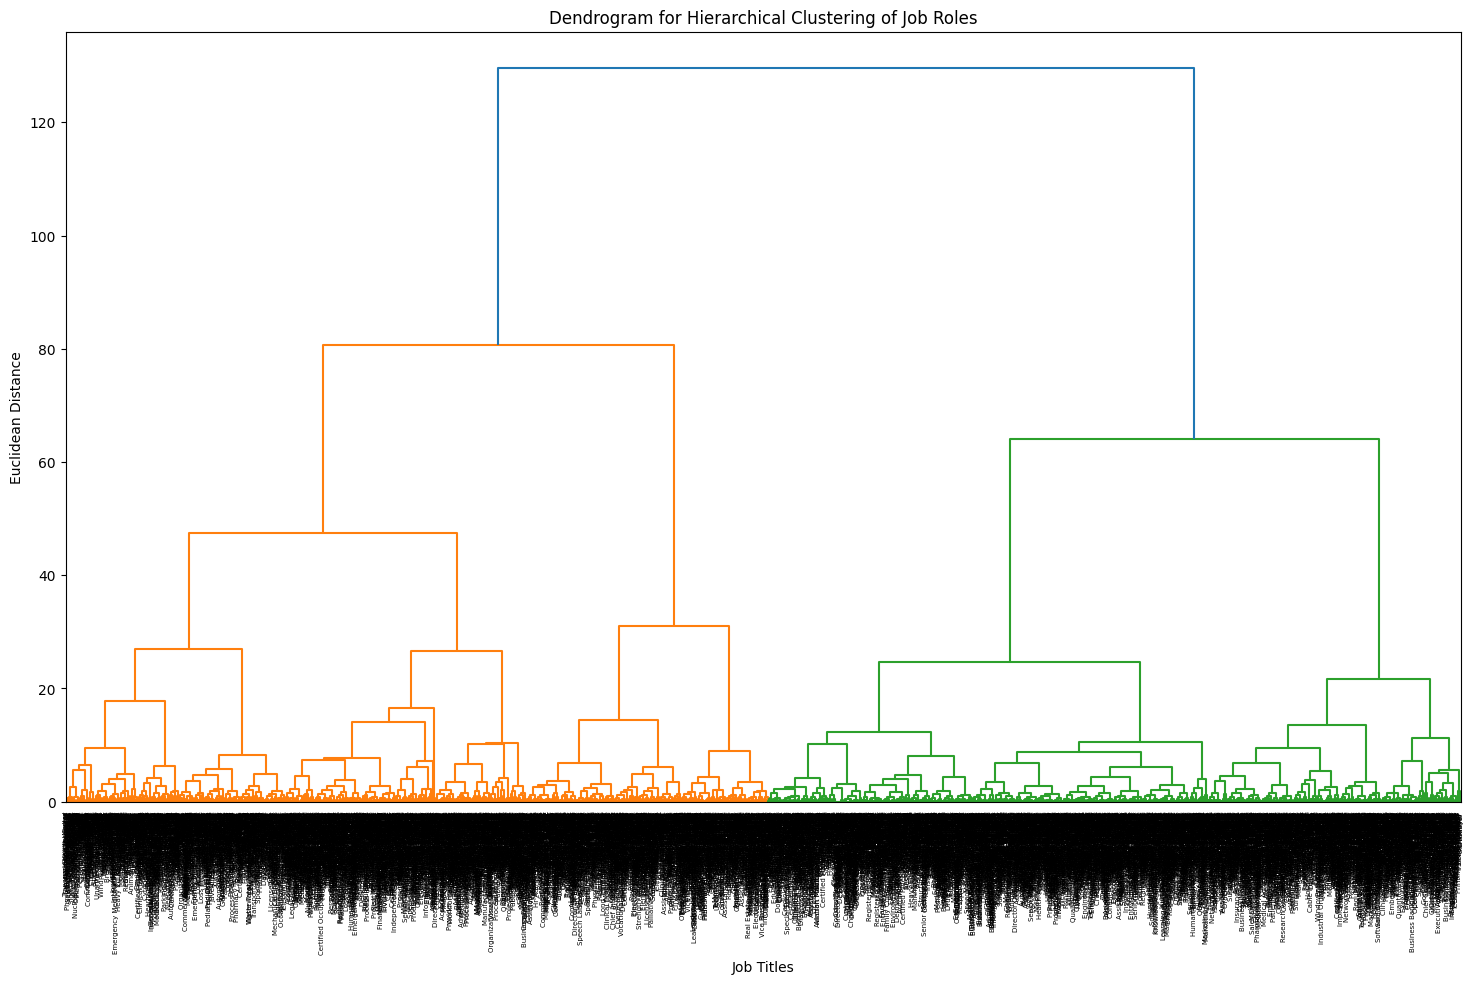

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Performing hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plotting the dendrogram to explore hierarchies between different job roles
plt.figure(figsize=(18, 10))
dendrogram(linked,
           orientation='top',
           labels=data['Job titiles'].values,
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering of Job Roles')
plt.xlabel('Job Titles')
plt.ylabel('Euclidean Distance')
plt.show()

In [24]:
# Displaying job roles by cluster
for cluster in data['Cluster'].unique():
    print(f"Cluster {cluster}:")
    print(data[data['Cluster'] == cluster][['Job titiles', 'AI Impact', 'Tasks', 'AI_Workload_Ratio']])
    print("\n")
    #_____________________________________end__________________________________________________

Cluster 2:
                 Job titiles  AI Impact  Tasks  AI_Workload_Ratio
0     Communications Manager       0.98    365           0.143362
1             Data Collector       0.95    299           0.139199
2                 Data Entry       0.95    325           0.142669
3                 Mail Clerk       0.95    193           0.141288
4         Compliance Officer       0.92    194           0.141709
...                      ...        ...    ...                ...
984        School Bus Driver       0.45     25           0.138889
985            Tanker Driver       0.45     28           0.151351
986             Truck Driver       0.45     29           0.153439
987                  Trucker       0.45     28           0.151351
1450             Air Marshal       0.40     41           0.126154

[860 rows x 4 columns]


Cluster 0:
                          Job titiles  AI Impact  Tasks  AI_Workload_Ratio
413                Safety Coordinator       0.60      1           0.500000
790       

Link to Dataset: https://www.kaggle.com/datasets/manavgupta92/from-data-entry-to-ceo-the-ai-job-threat-index

Reference List/Bibliography:

Muller, A., Guido, S. 2016. Introduction to Machine Learning with Python. Sebastopol: O'Reilly.